In [9]:
# for data Manipulation 

import numpy as np
import pandas as pd

# To ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [10]:
# loading the dataset

df = pd.read_csv('Churn_Modelling.csv')

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#check shape(rows and columns)

print("dataset contains", df.shape[0], "rows and", df.shape[1], "columns" )

dataset contains 10000 rows and 14 columns


In [13]:
#checking null values and data types

print("\nData Types:\n")
print(df.dtypes)

print("\nMissing Values:\n")
print(df.isnull().sum())


Data Types:

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing Values:

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [14]:
# checking column names

print("\nColumn Names:\n")

print(df.columns.tolist())


Column Names:

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [15]:
#count of churned and non-churned 

print(df['Exited']. value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


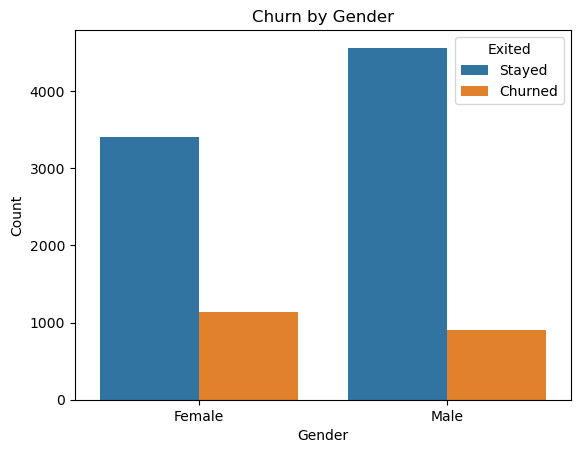

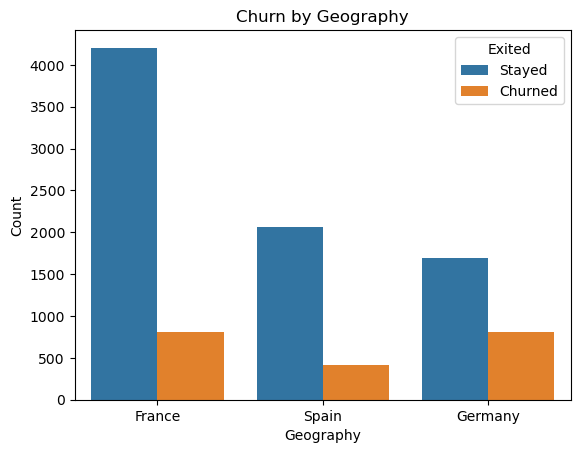

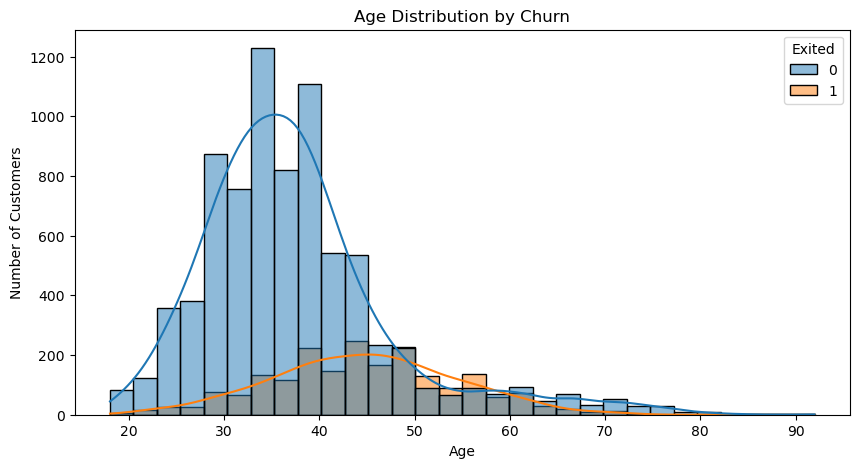

In [16]:
# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

# churn rate by Gender - countplot

sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()

# churn rate by geography-countplot 

sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()

#churn rate by Age - histogram

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Exited', bins=30, kde=True)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()





In [17]:
#drop unnecessary columns

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1) #axis = 0 means drop rows, axis = 1 means drop columns

In [18]:
# encoding categorial features

# We’ll use Label Encoding for simplicity: (Gender: Male/Female → 1/0), (Geography: France/Spain/Germany → 0/1/2)

from sklearn.preprocessing import LabelEncoder

# Encode Gender
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Encode Geography
le_geo = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])  # France = 0, Germany = 1, Spain = 2 (may vary)

print(le_gender.classes_) # to check the actual mapping

['Female' 'Male']


In [19]:
#seperate features and target

X = df.drop('Exited', axis=1)  # Features
y = df['Exited']               # Target

In [20]:
# test/train split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
# feature scaling

from sklearn.preprocessing import StandardScaler


# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Important: You fit only on the training data, and then transform both — this avoids data leakage.


# optional covert back to dataframe for readability

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [22]:
# Train logistic regression model
# Logistic Regression is a great baseline for classification tasks like churn prediction.

#import and train the model

from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Fit the model on scaled training data
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)


Accuracy: 0.805

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



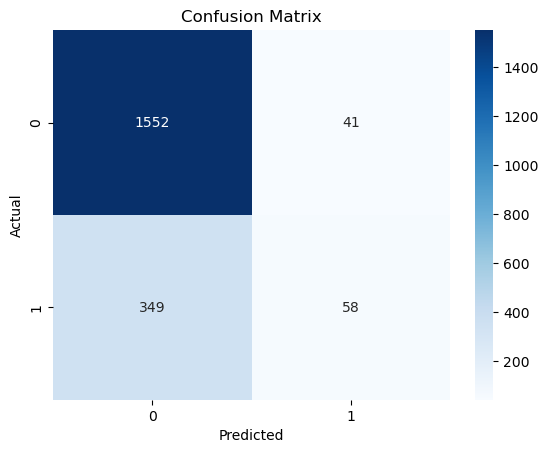

In [23]:
# evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# key observations 

# The model is very good at predicting customers who stayed (class 0).

# But it misses most of the customers who actually churned (class 1).

# Only 14% of real churners are caught (recall = 0.14)

# This is common when dealing with imbalanced classes, as we saw earlier (only ~20% churners).  

# confusion matrix:  

# True Negatives (Stayed, predicted stayed): 1,552

# False Positives (Stayed, predicted churned): 41

# False Negatives (Churned, predicted stayed): 349

# True Positives (Churned, predicted churned): 58

In [24]:
# now let's try using Random forest

# import and train the model

from sklearn.ensemble import RandomForestClassifier

# Create the model with class weights to help handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

#predict on test data

y_pred_rf = rf_model.predict(X_test_scaled)

Accuracy: 0.858

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



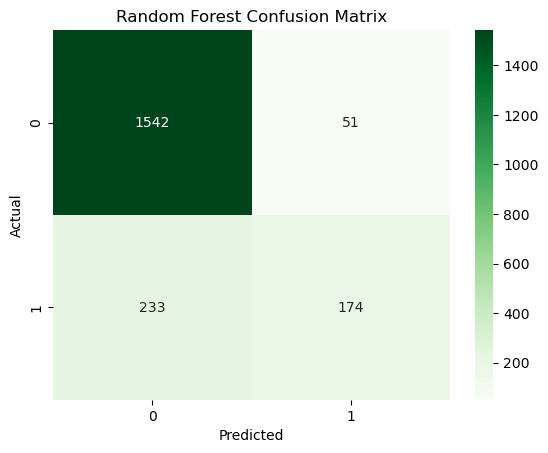

In [33]:
# the model was trained, let's evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Improvement! You’re now catching 174 churners, up from just 58 before

# Recall for churn increased from 0.14 ➜ 0.43

# Still some false negatives (233 churners missed), but much better balance now



In [36]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 653.6 kB/s eta 0:03:50
   ---------------------------------------- 0.1/150.0 MB 762.6 kB/s eta 0:03:17
   ---------------------------------------- 0.2/150.0 MB 1.2 MB/s eta 0:02:01
   ---------------------------------------- 0.3/150.0 MB 1.6 MB/s eta 0:01:33
   ---------------------------------------- 0.6/150.0 MB 2.6 MB/s eta 0:00:58
   ---------------------------------------- 1.2/150.0 MB 4.0 MB/s eta 0:00:38
    -----------------------------------

Accuracy: 0.847

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1593
           1       0.68      0.47      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.83      0.85      0.84      2000



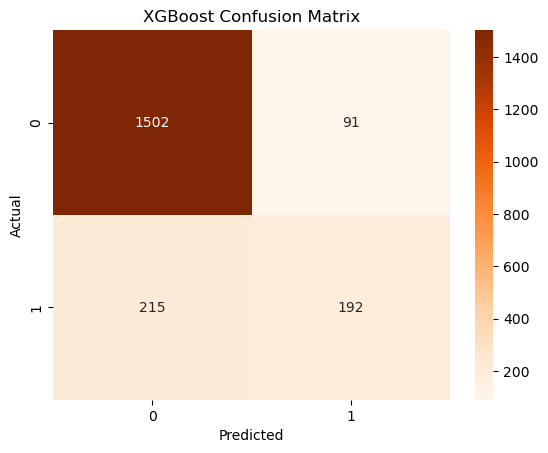

In [25]:
# let's try XG boost as well and observe the prediction

from xgboost import XGBClassifier

# Create the model with scale_pos_weight to handle imbalance
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(X_train_scaled, y_train) 

# Note: We skip scale_pos_weight for now — we’ll compare with and without SMOTE later.

# predict and evaluate:

y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
# Best recall for churn so far: 47% (better than RF: 43%, and way better than LR: 14%)

# 192 churners correctly identified, with fewer false positives than Random Forest

# Balanced trade-off between accuracy and minority class recall

# Hande imbalance with SMOTE 
# SMOTE = Synthetic Minority Over-sampling Technique
# It creates new churn examples to balance the dataset, and improves model sensitivity to class 1.



In [39]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB 660.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/8.3 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.4/8.3 MB 2.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.3 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.3 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.3 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.3 MB 4.7 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.3 MB 4.7 MB/s eta 0:00:02
   ---------- -------------

Before SMOTE: Exited
0    6370
1    1630
Name: count, dtype: int64
After SMOTE: Exited
1    6370
0    6370
Name: count, dtype: int64
Accuracy: 0.8455

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.55      0.59       407

    accuracy                           0.85      2000
   macro avg       0.76      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



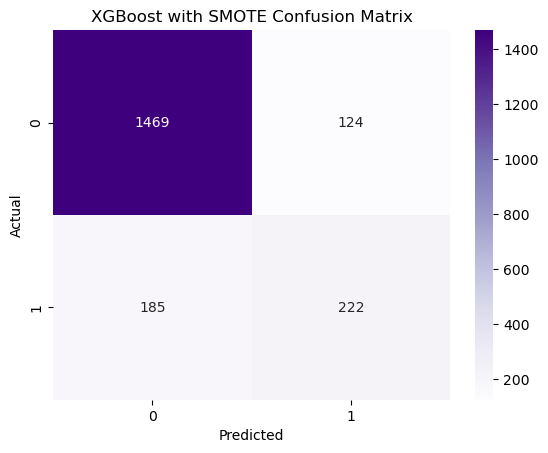

In [27]:
# let's import and apply smote
# We apply SMOTE only to the training set, not the test set.

from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply to training data
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


# retain a model(using XGboost again)

from xgboost import XGBClassifier

# Train XGBoost on balanced data
xgb_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_smote.fit(X_train_sm, y_train_sm)

# Predict on original test set
y_pred_smote = xgb_smote.predict(X_test_scaled)


# evaluating the new model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost with SMOTE Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
# Accuracy: 84.5% — similar to before

# Churn Recall Improved: from 0.47 ➜ 0.55

# 222 churners correctly identified (up from 192 with plain XGBoost)

# what I have built so far: 

# I had built a production-grade churn prediction pipeline:

# Logistic Regression (baseline)

# Random Forest (stronger)

# XGBoost (best balance)

# SMOTE-enhanced XGBoost (most sensitive to churn)

<Figure size 1000x600 with 0 Axes>

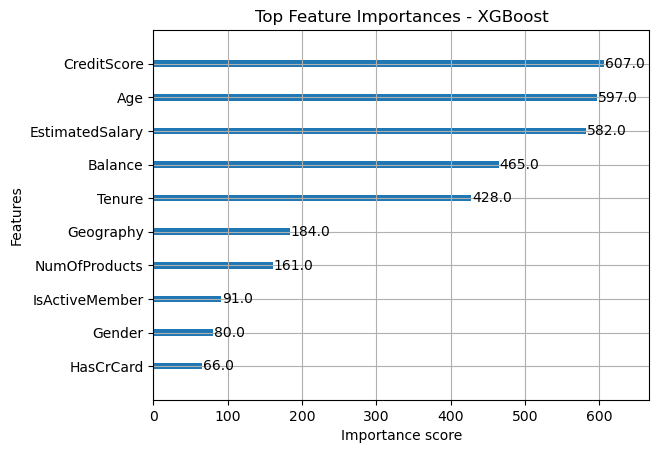

In [29]:
# let's See which features (Age, Geography, etc.) are driving churn predictions

 # Use XGBoost built-in importance or SHAP for explainability

# feature Importance 

# XGBoost's Built-in Feature Importance

# Plot feature importance from XGBoost
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_smote, max_num_features=10)  # or xgb_model if you didn't use SMOTE
plt.title("Top Feature Importances - XGBoost")
plt.show()

In [24]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/aa/7c/eead607a358b2466b95b302e4a7eae717eeed53615653fbbd4c1527041b9/shap-0.48.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ------ --------------------------------- 92.2/544.4 kB 1.7 MB/s eta 0:00:01
   ------------------- -------------------- 266.2/544.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  542.7/544.4 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


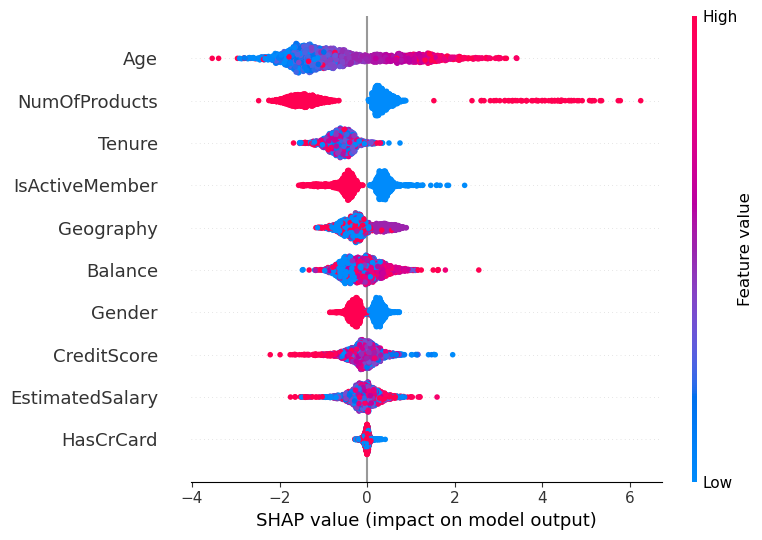

In [30]:
import shap

# Use explainer on XGBoost model
explainer = shap.Explainer(xgb_smote)
shap_values = explainer(X_test_scaled)

# Global summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

In [32]:
# lets talk about above results

# XGBoost Feature Importance (Built-in): 
# Showed how often features were used in splits.
# Top features:CreditScore, Age, EstimatedSalary, Balance, Tenure
 # Great for overall ranking, but doesn't tell direction (e.g., high age = more/less churn?) which we may find in SHAP insights 
    
# SHAP: 

# SHAP showed both impact and direction.

# Age: Higher values → more likely to churn (pink on right)

# IsActiveMember: Active customers (blue) → less churn

# NumOfProducts: 1 product seems risky for churn (visible on left edge)

# Geography: Has some push/pull effect depending on region

# Note: SHAP is better for storytelling → “Why does this customer churn?”